In [1]:
import sys
sys.path.append('C:\Anaconda3\Lib\site-packages')

import json
import numpy as np
import datetime as dt
import glob
import os
import pandas as pd

% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
sns.set_style('whitegrid')

# plotting on world maps
from mpl_toolkits.basemap import Basemap

# finding the state based on geotags
from geopy.geocoders import Nominatim

# the Geonamescache library contains information
# about continents, cities and US states
import geonamescache

# regular expressions for matching tweet
# locations to a dictionary of locations
import re

### area for tweet scraping

In [3]:
from twitter_functions import *
api = load_api()
tweets, tweet_id = tweet_search(api, 'the', 1, 1, 1, '')
tweets[0].created_at

found 1 tweets


datetime.datetime(2016, 3, 16, 21, 30, 55)

The time of the most recent tweet was 7 hours ahead of me.  This means the tweets are being returned in coordinated universal time (UTC).

### data analysis tests

In [ ]:
with open('#makedonalddrumpfagain_2016-02-29.json','r') as f:
    count = 0
    RTcount = 0
    tweet_dates = []
    for line in f.readlines():
        count += 1
        #tweet_date = json.loads(line)['created_at']
        tweet = json.loads(line)
        date =  dt.datetime.strptime(tweet['created_at'], '%a %b %d %H:%M:%S +0000 %Y')#.replace(tzinfo=pytz.UTC)
        tweet_dates.append(date)

plt.hist([t.hour + t.minute/60. for t in tweet_dates], bins = 24*60/15)

#        if "RT" in json.loads(line)['text']:
#            RTcount += 1
        #print(json.loads(line)['created_at'])
        #print(json.loads(line)['id'])
print(RTcount)
print(count)
print(json.loads(line)['created_at'])

### Read our tweets into a dataframe

In [7]:
# use glob to search through all dates with specific hashtag
# then read the files and load the cumulitive result into a
# dictionary to return
def merge_tweets(file_root):
    ''' Function that compiles tweets from multiple files
        into a single list.  This may take a while.'''
    print(list(glob.iglob(file_root+'*')))
    tweet_files = list(glob.iglob(file_root+'*'))
    tweets = []
    for file in tweet_files:
        with open(file, 'r') as f:
            for line in f.readlines():
                tweets.append(json.loads(line))
        print('finished importing file:', file)
    return tweets

In [6]:
drumpf_tweets = merge_tweets(file_root='#make')
#drumpf_tweets = merge_tweets(file_root='#makedonalddrumpfagain_2016-02-29')

['#makedonalddrumpfagain_2016-02-29.json', '#makedonalddrumpfagain_2016-03-01.json', '#makedonalddrumpfagain_2016-03-02.json', '#makedonalddrumpfagain_2016-03-03.json', '#makedonalddrumpfagain_2016-03-04.json', '#makedonalddrumpfagain_2016-03-05.json', '#makedonalddrumpfagain_2016-03-06.json', '#makedonalddrumpfagain_2016-03-07.json', '#makedonalddrumpfagain_2016-03-08.json', '#makedonalddrumpfagain_2016-03-09.json', '#makedonalddrumpfagain_2016-03-10.json', '#makedonalddrumpfagain_2016-03-11.json', '#makedonalddrumpfagain_2016-03-12.json', '#makedonalddrumpfagain_2016-03-13.json', '#makedonalddrumpfagain_2016-03-14.json', '#makedonalddrumpfagain_2016-03-15.json']


In [ ]:
drumpf_tweets[0]

In [8]:
def populate_tweet_df(tweets):
    df = pd.DataFrame()

    #df['text'] = list(map(lambda tweet: tweet['text'], tweets))
    
    df['location'] = list(map(lambda tweet: tweet['user']['location'], tweets))
    
    df['country_code'] = list(map(lambda tweet: tweet['place']['country_code']
                                  if tweet['place'] != None else '', tweets))
    
    df['long'] = list(map(lambda tweet: tweet['coordinates']['coordinates'][0]
                        if tweet['coordinates'] != None else 'NaN', tweets))
    
    df['latt'] = list(map(lambda tweet: tweet['coordinates']['coordinates'][1]
                        if tweet['coordinates'] != None else 'NaN', tweets))

    return df

In [9]:
drumpf_dataframe = populate_tweet_df(drumpf_tweets)

In [10]:
drumpf_dataframe

,location,country_code,long,latt
0,Texas,,NaN,NaN
1,Mexico City,,NaN,NaN
2,Long Island NY,,NaN,NaN
3,Long Island NY,,NaN,NaN
4,"New York,NY",,NaN,NaN
5,"Calgary, Alberta",,NaN,NaN
6,,,NaN,NaN
7,,,NaN,NaN
8,,,NaN,NaN
9,"Cincinnati, OH",,NaN,NaN


Let's get all the US tweets that have a location.

In [6]:
# create new dataframe with the NaN entries removed
#df = drumpf_dataframe.loc[(drumpf_dataframe.latt != 'NaN')
#                        & (drumpf_dataframe.long != 'NaN')]

#df = drumpf_dataframe.loc[(drumpf_dataframe.country_code == 'US')
#                        & (drumpf_dataframe.location != '')]

df = drumpf_dataframe.loc[(drumpf_dataframe.location != '')]

df

,location,country_code,long,latt
198,"frederick, md",US,NaN,NaN
249,NYC,US,NaN,NaN
508,North Carolina,US,NaN,NaN
511,"Wichita, KS",US,NaN,NaN
543,Dallas Area,US,NaN,NaN
547,"Holland, Michigan USA",US,NaN,NaN
565,"Lloyd Harbor, NY",US,NaN,NaN
602,U.S.A.,US,NaN,NaN
624,"Long Island, NY",US,NaN,NaN
764,Richmond VA | Frankfort KY,US,NaN,NaN


### location based on longitude lattitude

In [89]:
def get_states(longs, latts):
    ''' Input two 1D lists of floats/ints '''
    # a list of states
    states = []
    # use a coordinate tool from the geopy library
    geolocator = Nominatim()
    for lon, lat in zip(longs, latts):
        try:
            # get the state name
            location = geolocator.reverse(str(lat)+', '+str(lon))
            state = location.raw['address']['state']
        except:
            # return empty string
            state = ''
        states.append(state)
    return states

In [ ]:
longs = list(df.loc[(df.long != 'NaN')].long)
latts = list(df.loc[df.latt != 'NaN'].latt)
print(longs)
print(latts)

states = get_states(longs, latts)
print(states)

### make a dictionary of us states and cities

In [73]:
# get a dictionary of states: 'c'
gc = geonamescache.GeonamesCache()
s = gc.get_us_states()

# link state ID's e.g., TX, AB ...
# to states e.g., Texas, Alabama ...
stateID_to_state = {}
# define a list of states not to
# include as lower case due to chance
# of confusion with other words
no_lower_case_conversion = [
    'HI', 'IN', 'ME', 'MT', 'OH', 'OK', 'OR']
for key in s.keys():
    state = s[key]['name']
    stateID_to_state[key] = state
    if key not in no_lower_case_conversion:
        stateID_to_state[key.lower()] = state

# link state name to itself
state_to_state = {}
for key in s.keys():
    state = s[key]['name']
    state_to_state[state] = state

In [ ]:
# get a dictionary of cities: 'c'
gc = geonamescache.GeonamesCache()
c = gc.get_cities()

# extract the US city names and coordinates
US_cities = [c[key]['name'] for key in list(c.keys())
          if c[key]['countrycode'] == 'US']
US_longs = [c[key]['longitude'] for key in list(c.keys())
         if c[key]['countrycode'] == 'US']
US_latts = [c[key]['latitude'] for key in list(c.keys())
        if c[key]['countrycode'] == 'US']

In [ ]:
# find the states of each city
# WARNING: this takes a while
US_states = get_states(US_longs, US_latts)

In [7]:
# print the data to a file for quick
# reading next time

filename = 'US_city_to_state.dat'
if not os.path.isfile(filename):
    with open(filename, 'w') as f:
        for city, state in zip(US_cities, US_states):
            try:
                f.write(city + ',' + state + ' \n')
            except:
                print('Cannot write city named:', city,
                      'in state', state)
            
US_cities, US_states = [], []
with open(filename, 'r') as f:
    for line in f.readlines():
        line = line.split(',')
        US_cities.append(line[0])
        US_states.append(line[1][:-2])

In [16]:
# create a dictionary linking cities
# as keys with their states

city_to_state = {}
for city, state in zip(US_cities, US_states):
    if state:
        city_to_state[city] = state

### search through the dataframe and add a column for the actual location

In [82]:
def find_word(w):
    return re.compile(r'\b({0})\b'.format(w),
                      flags=re.IGNORECASE)

def find_word_case(w):
    return re.compile(r'\b({0})\b'.format(w))

def find_state_name(tweet_location):
    
    # look for the state ID in
    # the location string
    for key in stateID_to_state.keys():
        # search for the case sensitive state ID
        # to avoid matching things like
        # location = 'here or there' = Oregon
        if find_word_case(key).search(tweet_location):
            print(tweet_location, ':', key, '->', stateID_to_state[key])
            return stateID_to_state[key]
    
    # look for states
    for key in state_to_state.keys():
        if find_word(key).search(tweet_location):
            print(tweet_location, ':', key, '->', state_to_state[key])
            return state_to_state[key]
        
    # look for cities
    for key in city_to_state.keys():
        if find_word(key).search(tweet_location):
            print(tweet_location, ':', key, '->', city_to_state[key])
            return city_to_state[key]
        
    # otherwise return empty string
    return ''

In [83]:
states = []
for i in df.index:
    states.append(find_state_name(df.location[i]))

frederick, md : md -> Maryland
North Carolina : North Carolina -> North Carolina
Wichita, KS : KS -> Kansas
Dallas Area : Dallas -> Texas
Holland, Michigan USA  : Michigan -> Michigan
Lloyd Harbor, NY : NY -> New York
Long Island, NY : NY -> New York
Richmond VA | Frankfort KY : VA -> Virginia
Virginia, USA : Virginia -> Virginia
chicago  illinois : Illinois -> Illinois
chicago  illinois : Illinois -> Illinois
Roaring Fork Valley, Colorado : Colorado -> Colorado
Florida, USA : Florida -> Florida
Palm Springs, CA : CA -> California
Chicago, IL, USA : IL -> Illinois
San Francisco, CA : CA -> California
Los Angeles, Ca : los angeles -> California
Vancouver Island, BC : vancouver -> Washington
Houston, TX : TX -> Texas
Ann Arbor : Ann Arbor -> Michigan
Roaring Fork Valley, Colorado : Colorado -> Colorado
Los Angeles : los angeles -> California
Byron, IL : IL -> Illinois
Greenville, Michigan : Michigan -> Michigan
North Carolina : North Carolina -> North Carolina
Las Vegas, NV : NV -> Nevad

In [87]:
count = 0
for i in states:
    if i=='':
        count += 1
print((len(states)-count)/len(df.index)*100,
      '% of tweet locations found')

82.36636245110822 % of tweet locations found


In [96]:
# disable warning
# default='warn'
pd.options.mode.chained_assignment = None

df['State'] = states
df

,location,country_code,long,latt,State
198,"frederick, md",US,NaN,NaN,Maryland
249,NYC,US,NaN,NaN,
508,North Carolina,US,NaN,NaN,North Carolina
511,"Wichita, KS",US,NaN,NaN,Kansas
543,Dallas Area,US,NaN,NaN,Texas
547,"Holland, Michigan USA",US,NaN,NaN,Michigan
565,"Lloyd Harbor, NY",US,NaN,NaN,New York
602,U.S.A.,US,NaN,NaN,
624,"Long Island, NY",US,NaN,NaN,New York
764,Richmond VA | Frankfort KY,US,NaN,NaN,Virginia


In [98]:
# finally, look up the long/latt
# coordinates for tweets where the
# state was not found
for i in df.index:
    if df.long[i] != 'NaN' and df.latt[i] != 'NaN':
        if df.State[i] == '':
            state = get_states([df.long[i]],[df.latt[i]])
            df.State[i] = state[0]
            print('Found state:', state[0], 'for location =', location)

In [100]:
# make a list of US states
gc = geonamescache.GeonamesCache()
s = gc.get_us_states()
states = []
for key in s.keys():
    states.append(s[key]['name'])
    
# get the population of each state

# count how many tweets come from each state

['New Jersey', 'Alabama', 'North Carolina', 'Iowa', 'Illinois', 'Vermont', 'Hawaii', 'Colorado', 'Maryland', 'Oklahoma', 'Nebraska', 'South Carolina', 'Maine', 'Rhode Island', 'Wisconsin', 'Nevada', 'New York', 'Alaska', 'Arizona', 'New Mexico', 'Arkansas', 'Tennessee', 'Connecticut', 'Oregon', 'Pennsylvania', 'Minnesota', 'Wyoming', 'South Dakota', 'Virginia', 'Delaware', 'Utah', 'Kansas', 'Washington', 'West Virginia', 'Indiana', 'District of Columbia', 'Idaho', 'Louisiana', 'Kentucky', 'Missouri', 'Mississippi', 'Texas', 'New Hampshire', 'Michigan', 'Montana', 'Florida', 'Massachusetts', 'California', 'Georgia', 'Ohio', 'North Dakota']


### Using basemap to plot tweet lattitude and longitude

In [101]:
m1 = Basemap(projection='ortho', lat_0=50, lon_0=-100,
                 resolution='l', area_thresh=1000.0)
m1.llcrnrx
m1.llcrnry

0.0

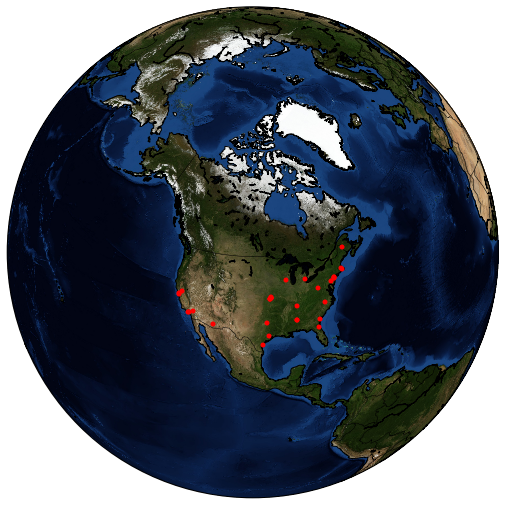

In [122]:
m1 = Basemap(projection='ortho', lat_0=50, lon_0=-100,
                 resolution='l', area_thresh=1000.0)

my_map = Basemap(projection='ortho', lat_0=50, lon_0=-100,
                 resolution='l', area_thresh=1000.0,
                 llcrnrx=0.0,
                 llcrnry=0.0)
                 #urcrnrx=0.0,
                 #urcrnry=0.0)
                 #urcrnrx=m1.urcrnrx*0.3,
                 #urcrnry=m1.urcrnry*0.1)

my_map.drawcountries()
#my_map.drawstates()
my_map.drawcoastlines()
my_map.bluemarble()

longs = list(df.loc[(df.long != 'NaN')].long)
latts = list(df.loc[df.latt != 'NaN'].latt)
x, y = my_map(longs, latts)
my_map.plot(x, y, 'ro', markersize=5)

plt.show()

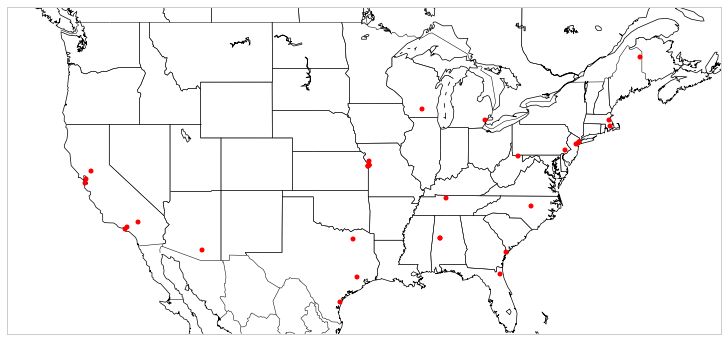

In [156]:
my_map = Basemap(projection='merc', lat_0=50, lon_0=-100,
                     resolution = 'l', area_thresh = 1000.0,
                     llcrnrlon=-130, llcrnrlat=25,
                     urcrnrlon=-60, urcrnrlat=50)
# do resolution='h' for high quality

my_map.drawcountries()
my_map.drawstates()
my_map.drawcoastlines(linewidth=0.7)

#longs = list(df.loc[(df.long != 'NaN')].long)
#latts = list(df.loc[df.latt != 'NaN'].latt)
x, y = my_map(longs, latts)
my_map.plot(x, y, 'ro', markersize=5)

plt.show()

In [11]:
df = drumpf_dataframe

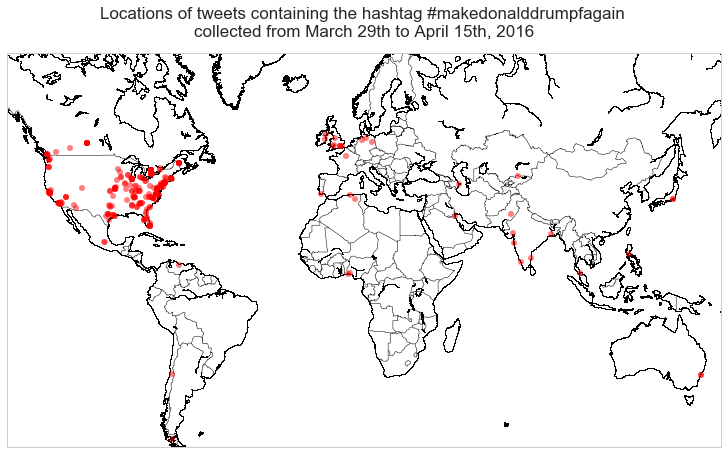

In [36]:
my_map = Basemap(projection='merc', lat_0=50, lon_0=-100,
                     resolution = 'l', area_thresh = 5000.0,
                     llcrnrlon=-140, llcrnrlat=-55,
                     urcrnrlon=160, urcrnrlat=70)
# set resolution='h' for high quality

my_map.drawcountries()
#my_map.drawstates()
my_map.drawcoastlines(antialiased=False,
                      linewidth=0.005)

longs = list(df.loc[(df.long != 'NaN')].long)
latts = list(df.loc[df.latt != 'NaN'].latt)
x, y = my_map(longs, latts)
my_map.plot(x, y, 'ro', markersize=6, alpha=0.5)

plt.title('Locations of tweets containing the hashtag #makedonalddrumpfagain \ncollected from March 29th to April 15th, 2016', y=1.03, fontsize=17, alpha=1)
plt.savefig('drumpf_tweet_locations_world.png', bbox_inches='tight', dpi=144)
plt.show()

In [13]:
print(len(longs))

335
